# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Student Details

Student Name and ID: Aiman Abdullah
Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn library
import sklearn
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,5/2/1953,GA,NaN,Tornado,Tornado,5/2/1953,5/2/1953,6/1/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,5/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,5/15/1953,5/15/1953,1/1/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,5/29/1953,LA,NaN,Flood,Flood,5/29/1953,5/29/1953,2/1/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,6/2/1953,MI,NaN,Tornado,Tornado,6/2/1953,6/2/1953,2/1/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,6/6/1953,MT,NaN,Flood,Floods,6/6/1953,6/6/1953,12/1/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [4]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.


# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n")
print(df_data.info())
print("\n")
print("The total Number of Rows , Columns are: {}".format(df_data.shape))

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows: %s and number of columns: %s" % (num_rows, num_cols))

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 

print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n", df_data['Start Date'].describe())

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
num_tot_years = df_data['Disaster Title'].unique().tolist()
num_uniq_county = df_data['County'].unique().tolist()

print ("\n\n >>Task 1-d:")
print("All the Unique Disaster Title")
print(num_tot_years)
print("#####################################################")
print(" All the Unique County")
print(num_uniq_county)
print('\n\n')



>>Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Declaration Number                46185 non-null  object
 1   Declaration Type                  46185 non-null  object
 2   Declaration Date                  46185 non-null  object
 3   State                             46185 non-null  object
 4   County                            45988 non-null  object
 5   Disaster Type                     46185 non-null  object
 6   Disaster Title                    46185 non-null  object
 7   Start Date                        46185 non-null  object
 8   End Date                          45843 non-null  object
 9   Close Date                        35210 non-null  object
 10  Individual Assistance Program     46185 non-null  object
 11  Individuals & Households Progra

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [5]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days
df_data['difference'] = np.abs(pd.to_datetime(df_data['End Date']) - pd.to_datetime(df_data['Start Date']))
Emergency_greater_90 = df_data[(df_data['Declaration Type'] == 'Emergency') & (df_data['difference'].dt.days > 120)]
print(">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s"% (Emergency_greater_90))


# 8 points
#Task 2-b: Find out the total number of declarations for the years 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.
#
num_declarations_1998 = df_data[(pd.to_datetime(df_data['Declaration Date']).dt.year == 1998) | (pd.to_datetime(df_data['Declaration Date']).dt.year == 1999) & (df_data['Individual Assistance Program'] == 'Yes') & (df_data['State'] == 'TX')]["Declaration Number"].count()
print("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s"% (num_declarations_1998))


# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
n = 10
top10_disasters = df_data[df_data['Declaration Type'] == 'Disaster']['County'].value_counts().head(n)
top10_emergencies = df_data[df_data['Declaration Type'] == 'Emergency']['County'].value_counts().head(n)
print("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" %(top10_disasters))
print("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))



>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are       Declaration Number Declaration Type Declaration Date State                   County Disaster Type        Disaster Title  Start Date    End Date  Close Date Individual Assistance Program Individuals & Households Program Public Assistance Program Hazard Mitigation Program difference
14888            EM-3117        Emergency        2/23/1996    TX          Anderson County          Fire  Extreme  Fire Hazard   2/23/1996   9/19/1996   3/18/1998                            No                               No                       Yes                       Yes   209 days
14889            EM-3117        Emergency        2/23/1996    TX          Angelina County          Fire  Extreme  Fire Hazard   2/23/1996   9/19/1996   3/18/1998                            No                               No                       Yes                       Yes   209 days
14890            EM-3117        Emergency    



>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 1514


>>Task 2-c: top 10 counties with the most disasters for all years are: 
Washington County    294
Jefferson County     286
Jackson County       271
Franklin County      265
Lincoln County       242
Clay County          220
Madison County       206
Montgomery County    205
Monroe County        197
Marion County        191
Name: County, dtype: int64


>>Task 2-c: top 10 counties with the most emergencies for all years are: 
Washington County    107
Franklin County       94
Jackson County        80
Jefferson County      78
Montgomery County     77
Monroe County         67
Lincoln County        66
Madison County        60
Warren County         59
Marion County         59
Name: County, dtype: int64


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

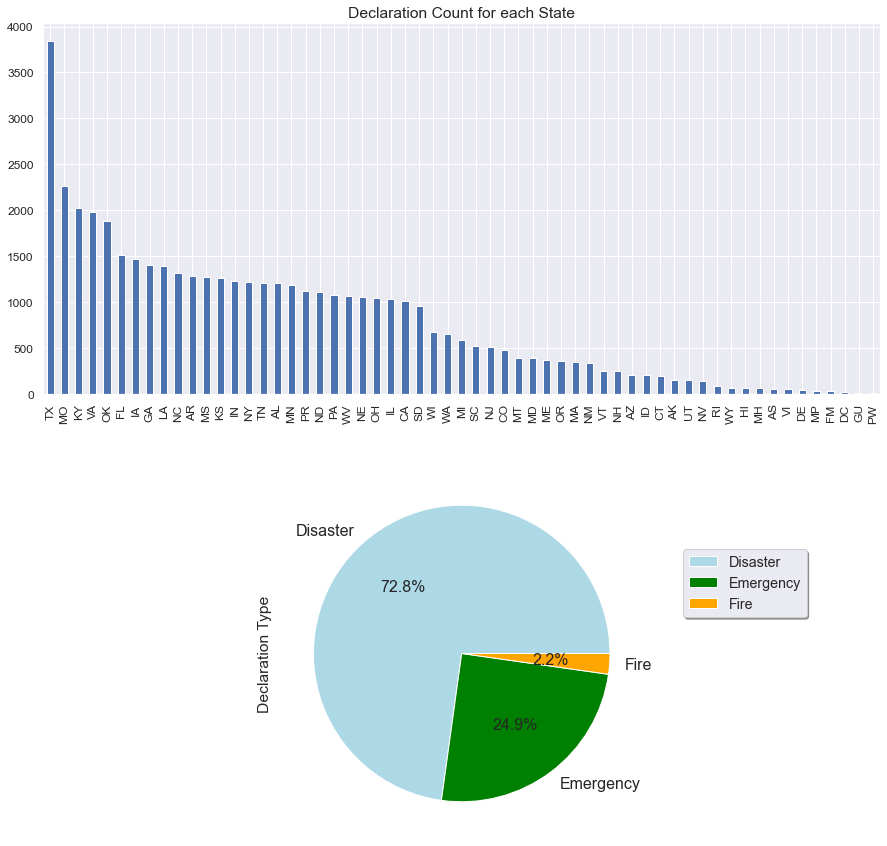

In [6]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
sns.set_style('whitegrid')  
sns.set(font_scale=1.3)

figure = plt.figure()                  
figure1= figure.add_subplot(2,1,1)      
figure2= figure.add_subplot(2,1,2)
df_data["State"].value_counts().plot(kind='bar',fontsize=12,figsize=(16,16),title ='Declaration Count for each State',ax=figure1)

#########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that lists the top-10 talest althlets for all years.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b 
colors = ['lightBlue', 'green', 'orange']
df_data["Declaration Type"].value_counts().plot(kind='pie', fontsize=16, figsize=(15,15), colors=colors, autopct='%1.1f%%', ax= figure2)
plt.legend(bbox_to_anchor=(1.45, 0.8), shadow=True)
plt.show()
#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 


Task 4 Explanation:
1- The diagram of 'Disaster Type' VS 'Individuals & Households Program' shows what the relationship between
 a Individuals & Households Program and Disaster Type. We can see that Tornado, Flood, Fire,and Hurricane are include in Individuals & Households program for them during the whole time of the data
set. While we can see Snow, Drought, terrorism, Tsunami are always has no Individuals & Households Program.


2- The diagram of 'Disaster Type' VS 'State' shows how the Disaster type appears in the most of the States in USA.
We can see that most states has been affected by more than one Disaster.
For example Storm hit most of the States in USA as well as
Hurricane, and Flood, however, Dam/Levee Break which affect only CA, CO. Also, Terrorism appears only in MIA, VA.

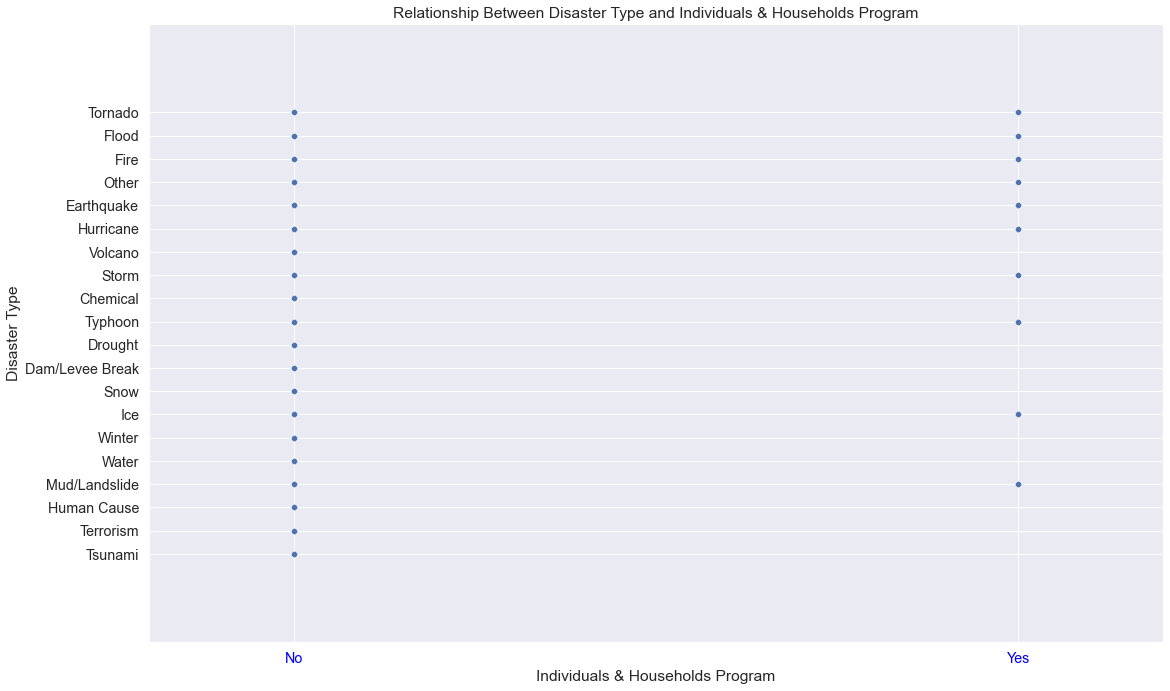

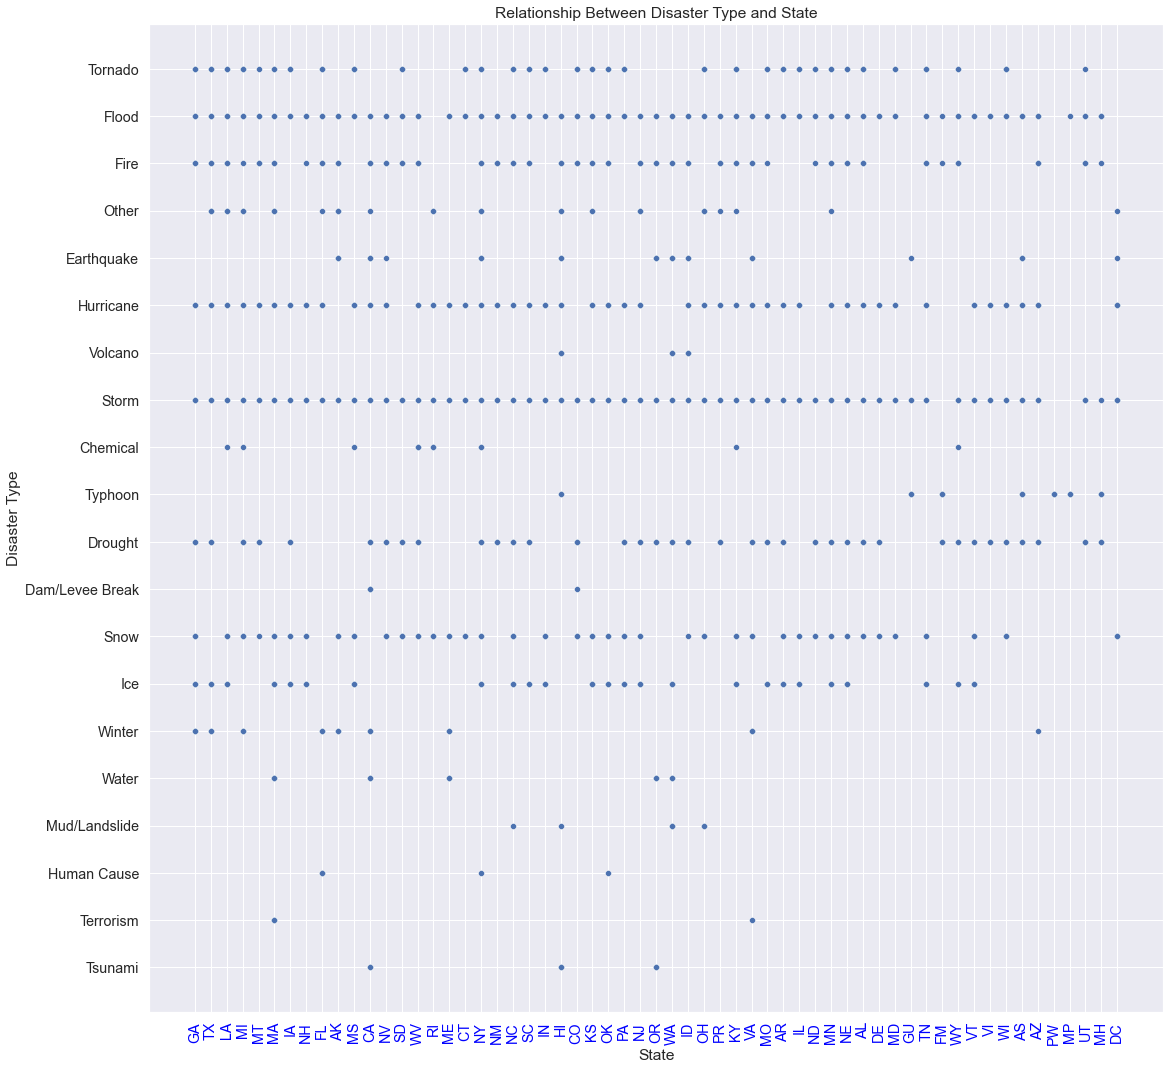

In [7]:

#########################begin code for Task 4

figure = plt.figure(figsize=(40, 40))
gs = figure.add_gridspec(3, 2)
ax = figure.add_subplot(gs[0, 0])
ax.set_title('Relationship Between Disaster Type and Individuals & Households Program')
sns.scatterplot(x='Individuals & Households Program', y='Disaster Type', data=df_data)
plt.xticks(color='blue', rotation=0)
plt.margins(0.2)
plt.subplots_adjust(bottom = 0.15)
plt.show()


figure = plt.figure(figsize=(40, 40))
gs = figure.add_gridspec(2,2)
ax = figure.add_subplot(gs[0,0])
ax.set_title('Relationship Between Disaster Type and State')
sns.scatterplot(x='State', y='Disaster Type', data=df_data)
plt.xticks(color='blue', rotation=90)
plt.show()

#########################end code for Task 4

Scikit-Learn Library

In this task we are utilizing scikit library to split the data into train and test data to make predictions about
the disaster type. Train data is used by the prediction model to learn disaster type trends and test data is used 
to compare the predictions with actual data.


Plot Explanation:
The following scatter plot plots the difference between the actual data and predicted data, we can clearly observe from the
plot that most of the predictions are around the 0 scale with few outliers which is the measure of correctness of predictions

<class 'sklearn.svm._classes.SVR'>
Accuracy Achieved: 0.8079119473096055


Text(0.5, 1.0, 'Accuracy measurment plot')

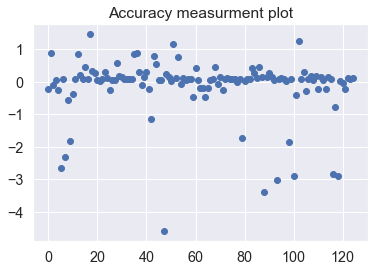

In [15]:


# Idea of this task is to get some samples of data from datasheet and learn about the disaster type
# pattern and predict disaster types for future


# The reason we chose 500 entries is to keep the processing time reasonable and predict in reasonable
# amount of time


# Loading first 500 entries of the database in order to make predictions on disaster types.
df_data = pd.read_csv('database.csv', encoding='latin1', skiprows=0, nrows=500)

# Encoding all attribute values in order to process using scikit
df_data["Disaster Type"] = df_data["Disaster Type"].astype("category").cat.codes
df_data["Declaration Type"] = df_data["Declaration Type"].astype("category").cat.codes
df_data["County"] = df_data["County"].astype("category").cat.codes
df_data["Disaster Title"] = df_data["Disaster Title"].astype("category").cat.codes
df_data["Individual Assistance Program"] = df_data["Individual Assistance Program"].astype("category").cat.codes
df_data["Individuals & Households Program"] = df_data["Individuals & Households Program"].astype("category").cat.codes
df_data["Public Assistance Program"] = df_data["Public Assistance Program"].astype("category").cat.codes
df_data["Hazard Mitigation Program"] = df_data["Hazard Mitigation Program"].astype("category").cat.codes
df_data["Start Date"] = df_data["Start Date"].astype("category").cat.codes
df_data["End Date"] = df_data["End Date"].astype("category").cat.codes
df_data["Close Date"] = df_data["Close Date"].astype("category").cat.codes
df_data["Declaration Date"] = df_data["Declaration Date"].astype("category").cat.codes
df_data["Declaration Number"] = df_data["Declaration Number"].astype("category").cat.codes
df_data["State"] = df_data["State"].astype("category").cat.codes

# Dropping "Disaster type" from the dataset to make predictions and return all the other attributes columns
X = df_data.drop("Disaster Type", axis=1).values


# Storing disaster type in y to compare the accuracy of predictions
y = df_data['Disaster Type'].values

# Splitting up training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = svm.SVR(kernel="linear") # Here we used svm model and open separate kernal from CPU to process our Project


# This is where the whole processing is carryed out
clf_score = clf.fit(X_train, y_train)

# predicting the future values based on the learning in the previous step
clf_predict = clf.predict(X_test)

# Calculating the accuracy of predictions
accuracy = clf.score(X_test, y_test)
print(f"Accuracy Achieved: {accuracy}")


# Plotting the difference between the actual values and predicted values
g = plt.plot(y_test - clf_predict, marker='o', linestyle='')
plt.title("Accuracy measurment plot")

#Plot Explanation:
#The following scatter plot plots the difference between the actual data and predicted data, we can clearly observe from the
#plot that most of the predictions are around the 0 scale with few outliers which is the measure of correctness of predictions

Visualization:
https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

https://r-coder.com/pie-chart-r/#:~:text=Pie%20chart%20in%20R%20with%20percentage,-Circle%20charts%20are&text=Note%20that%20the%20round%20function,modify%20the%20number%20of%20decimals.&text=An%20alternative%20to%20display%20percentages,the%20middle%20of%20the%20slices.

Aggregation & Filttering:
https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

Scikit-learn:
https://www.tutorialspoint.com/scikit_learn/index.htm
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
https://www.knowledgehut.com/tutorials/machine-learning/model-building-scikit-learn-python-library-machine-learning

